# Import required packages

In [1]:
!pip install open3d

In [2]:
import open3d as o3d
import numpy as np
import scipy
import os
import pandas as pd
import itertools

INFO - 2022-02-18 08:57:26,669 - utils - NumExpr defaulting to 8 threads.


In [3]:
pip install plyfile

Note: you may need to restart the kernel to use updated packages.


In [4]:
from scipy.sparse import coo_matrix, vstack
import scipy.sparse.linalg
from copy import deepcopy
from plyfile import PlyData, PlyElement

In [5]:
# Principal components analysis (PCA)¶

from sklearn.decomposition import PCA

# Read and Tidy the Data:

In [6]:
csr0001a = PlyData.read('/Users/negin/Desktop/UVA/Prof. Baek/CAESAR/csr0001a.ply')

In [7]:
csr0001a

PlyData((PlyElement('vertex', (PlyProperty('x', 'float'), PlyProperty('y', 'float'), PlyProperty('z', 'float')), count=15178, comments=[]), PlyElement('face', (PlyListProperty('vertex_index', 'uchar', 'int'),), count=30352, comments=[])), text=True, byte_order='=', comments=['Exported by Stephen Baek'], obj_info=[])

In [8]:
csr0001a.elements[0].name       # Read the first file section name

'vertex'

In [9]:
csr0001a.elements[0].data[0:]             # Read the data

array([(-0.031466,  0.86258 , -0.05231 ),
       (-0.222086,  0.053442,  0.017621),
       ( 0.421967,  0.203108, -0.025312), ...,
       (-0.510778, -0.100984, -0.007467),
       ( 0.103666, -0.461767,  0.059079),
       ( 0.171571, -0.450008, -0.012297)],
      dtype=[('x', '<f4'), ('y', '<f4'), ('z', '<f4')])

csr0001a = [item for t in csr0001a for item in t]
csr0001a

In [10]:
csr0001a = [item for t in csr0001a for item in t]            # Previously I used this code 2 times to get the extended matrix
#csr0001a = [t for t in csr0001a.elements[0].data]         # prof. Baek suggestion - Read the first file as an example and doing transition from list of tuples to a single list
csr0001a

[(-0.031466, 0.86258, -0.05231),
 (-0.222086, 0.053442, 0.017621),
 (0.421967, 0.203108, -0.025312),
 (-0.235227, 0.050105, -0.06436),
 (0.082961, 0.632769, 0.017072),
 (0.092309, 0.620245, -0.025848),
 (0.144753, -0.150417, -0.126915),
 (0.024602, 0.681955, -0.073474),
 (-0.494189, -0.017906, 0.001502),
 (0.44142, 0.027795, -0.014657),
 (-0.210459, 0.287375, 0.003979),
 (-0.548631, -0.144882, 0.003332),
 (-0.487324, -0.067148, 0.112482),
 (0.158986, -0.292919, 0.091257),
 (0.222903, 0.334504, -0.096995),
 (-0.042579, -0.571173, -0.020862),
 (-0.353201, 0.235228, -0.095538),
 (0.031923, 0.580758, 0.048434),
 (0.130385, -0.880745, -0.070825),
 (-0.154743, -0.570112, 0.0309),
 (0.18841, -0.347409, 0.017616),
 (0.160338, -0.769297, -0.064161),
 (-0.116579, 0.58702, 0.004738),
 (-0.14847, -0.924878, 0.015284),
 (-0.077754, 0.138643, -0.168406),
 (0.103166, 0.702901, 0.018728),
 (-0.253189, 0.3773, 0.006436),
 (0.545481, -0.12981, -0.013332),
 (-0.155445, 0.001106, 0.138783),
 (0.082554, 0.

In [11]:
csr0001a = [item for t in csr0001a for item in t]         # Convert the 1*n list to a n*1 list
csr0001a

[-0.031466,
 0.86258,
 -0.05231,
 -0.222086,
 0.053442,
 0.017621,
 0.421967,
 0.203108,
 -0.025312,
 -0.235227,
 0.050105,
 -0.06436,
 0.082961,
 0.632769,
 0.017072,
 0.092309,
 0.620245,
 -0.025848,
 0.144753,
 -0.150417,
 -0.126915,
 0.024602,
 0.681955,
 -0.073474,
 -0.494189,
 -0.017906,
 0.001502,
 0.44142,
 0.027795,
 -0.014657,
 -0.210459,
 0.287375,
 0.003979,
 -0.548631,
 -0.144882,
 0.003332,
 -0.487324,
 -0.067148,
 0.112482,
 0.158986,
 -0.292919,
 0.091257,
 0.222903,
 0.334504,
 -0.096995,
 -0.042579,
 -0.571173,
 -0.020862,
 -0.353201,
 0.235228,
 -0.095538,
 0.031923,
 0.580758,
 0.048434,
 0.130385,
 -0.880745,
 -0.070825,
 -0.154743,
 -0.570112,
 0.0309,
 0.18841,
 -0.347409,
 0.017616,
 0.160338,
 -0.769297,
 -0.064161,
 -0.116579,
 0.58702,
 0.004738,
 -0.14847,
 -0.924878,
 0.015284,
 -0.077754,
 0.138643,
 -0.168406,
 0.103166,
 0.702901,
 0.018728,
 -0.253189,
 0.3773,
 0.006436,
 0.545481,
 -0.12981,
 -0.013332,
 -0.155445,
 0.001106,
 0.138783,
 0.082554,
 0.

In [12]:
len(csr0001a)

75886

In [13]:
del csr0001a[45534:]         # Delete the face vertices from the data set (example)

In [14]:
len(csr0001a)

45534

In [15]:
csr0001a[45533]   # double check the last vertex element 3*15178

-0.012297

In [16]:
from glob import glob
data = glob("/Users/negin/Desktop/UVA/Prof. Baek/CAESAR/csr*")

In [17]:
data.sort()
data

['/Users/negin/Desktop/UVA/Prof. Baek/CAESAR/csr0001a.ply',
 '/Users/negin/Desktop/UVA/Prof. Baek/CAESAR/csr0002a.ply',
 '/Users/negin/Desktop/UVA/Prof. Baek/CAESAR/csr0007a.ply',
 '/Users/negin/Desktop/UVA/Prof. Baek/CAESAR/csr0008a.ply',
 '/Users/negin/Desktop/UVA/Prof. Baek/CAESAR/csr0009a.ply',
 '/Users/negin/Desktop/UVA/Prof. Baek/CAESAR/csr0010a.ply',
 '/Users/negin/Desktop/UVA/Prof. Baek/CAESAR/csr0012a.ply',
 '/Users/negin/Desktop/UVA/Prof. Baek/CAESAR/csr0013a.ply',
 '/Users/negin/Desktop/UVA/Prof. Baek/CAESAR/csr0014a.ply',
 '/Users/negin/Desktop/UVA/Prof. Baek/CAESAR/csr0015a.ply',
 '/Users/negin/Desktop/UVA/Prof. Baek/CAESAR/csr0016a.ply',
 '/Users/negin/Desktop/UVA/Prof. Baek/CAESAR/csr0017a.ply',
 '/Users/negin/Desktop/UVA/Prof. Baek/CAESAR/csr0024a.ply',
 '/Users/negin/Desktop/UVA/Prof. Baek/CAESAR/csr0025a.ply',
 '/Users/negin/Desktop/UVA/Prof. Baek/CAESAR/csr0026a.ply',
 '/Users/negin/Desktop/UVA/Prof. Baek/CAESAR/csr0027a.ply',
 '/Users/negin/Desktop/UVA/Prof. Baek/CA

In [18]:
len(data)      # Number of total scans in the folder

2383

In [19]:
data[-1]         #this checks the last item in the list

'/Users/negin/Desktop/UVA/Prof. Baek/CAESAR/csr3028a.ply'

# Create a dataframe of 2383 scans:

In [20]:
import pandas as pd

In [21]:
table = []

In [22]:
data = data[0:]
for filename in data:
    currentfile = PlyData.read(filename)
    firstmatrix = [item for t in currentfile for item in t]
    secondmatrix = [item for t in firstmatrix for item in t]
    table.append(secondmatrix)
print(len(table))

2383


In [23]:
dataframe = pd.DataFrame(table)
dataframe = dataframe.transpose()
print(dataframe)


                        0                      1                      2     \
0                  -0.031466               -0.03989              -0.035324   
1                    0.86258               0.854115                0.81734   
2                   -0.05231              -0.050927              -0.058717   
3                  -0.222086              -0.181017               -0.17777   
4                   0.053442               0.075136               0.066424   
...                      ...                    ...                    ...   
75881   [10675, 2089, 10818]   [10675, 2089, 10818]   [10675, 2089, 10818]   
75882   [8973, 10538, 15177]   [8973, 10538, 15177]   [8973, 10538, 15177]   
75883  [14774, 15177, 10538]  [14774, 15177, 10538]  [14774, 15177, 10538]   
75884     [9444, 3578, 3537]     [9444, 3578, 3537]     [9444, 3578, 3537]   
75885    [14637, 3537, 3578]    [14637, 3537, 3578]    [14637, 3537, 3578]   

                        3                      4               

In [24]:
dataframe = dataframe.drop(dataframe.index[45534:])

# Create a CSV file for review:

In [25]:
#result = dataframe.to_csv("/Users/negin/Desktop/filename.csv")    # Create a CSV file 

# PCA



Since the dataset is already $standardized$, therefore there is no need to do it again.

In [26]:
X = dataframe.to_numpy()
print(X.shape)                
X

(45534, 2383)


array([[-0.03146599978208542, -0.039889998733997345,
        -0.03532399982213974, ..., -0.04025899991393089,
        -0.03200500085949898, -0.032625000923871994],
       [0.8625800013542175, 0.8541150093078613, 0.8173400163650513, ...,
        0.7954739928245544, 0.7594029903411865, 0.7535110116004944],
       [-0.052310001105070114, -0.050926998257637024,
        -0.05871700122952461, ..., -0.10157100111246109,
        -0.041342999786138535, -0.056150998920202255],
       ...,
       [0.17157100141048431, 0.1662289947271347, 0.14553500711917877,
        ..., 0.13088899850845337, 0.1441349983215332,
        0.13763000071048737],
       [-0.45000800490379333, -0.4063679873943329, -0.398377001285553,
        ..., -0.3701289892196655, -0.36142200231552124,
        -0.3315359950065613],
       [-0.012296999804675579, -0.020170999690890312,
        -0.012640000320971012, ..., -0.012814999558031559,
        -0.02491600066423416, -0.033612001687288284]], dtype=object)

In [27]:
import numpy as np
Xmean = np.mean(X, axis=-1)       # this in x tilda that shows the center of the whole plane (a plane with a dimension of 45534*2383)
Xmean                             # axis = -1 means the last axis, but why we are getting -1?????

array([-0.0391075543587753, 0.7981133849316668, -0.07032604029803118, ...,
       0.1462888354814658, -0.377556691713009, -0.023120786393600195],
      dtype=object)

# Find the optimal value (Scenario #1):

In [28]:
pca = PCA(n_components=0.95)  # Find the optimal number of Principal Components 95% variance explained features
pca

PCA(n_components=0.95)

In [29]:
P = pca.fit_transform(X-np.expand_dims(Xmean,axis=-1))    #eigen vectors v, and Eigen values landa by using pca.fit
P

array([[ 0.0051742 ,  0.10626399,  0.01062735, ...,  0.01879627,
        -0.01922575, -0.05036209],
       [-2.2630372 , -0.38258322,  0.08570537, ..., -0.04932544,
         0.0137127 , -0.02299847],
       [-0.23068776,  0.05513662, -0.42779801, ...,  0.00773981,
        -0.04239558, -0.06303643],
       ...,
       [-0.22129507,  0.32924513,  0.02123527, ..., -0.1875066 ,
         0.35197259, -0.11491861],
       [ 0.87214987, -0.64629679, -0.0212894 , ..., -0.10913009,
        -0.06635196,  0.08411509],
       [-0.04259179,  0.11791404, -0.18094207, ...,  0.16721471,
         0.1883819 , -0.01183254]])

In [30]:
P.shape  # eigenshape

(45534, 14)

## ***Optimal number of PCs that gives 95% of features to be varience explained is 14.***

In [31]:
print(pca.explained_variance_ratio_)

print(pca.singular_values_)      # Variance 

[0.59095989 0.15421235 0.04927528 0.03807782 0.02966305 0.01729825
 0.01534068 0.01285944 0.01202996 0.00752271 0.00653947 0.00614128
 0.00586206 0.00460231]
[186.99479974  95.52347456  53.9964364   47.46642925  41.89463707
  31.99275261  30.12817248  27.58427523  26.67980176  21.09782183
  19.67079082  19.06251204  18.62411382  16.50206812]


In [32]:
var = np.cumsum(np.round(pca.explained_variance_ratio_, decimals = 3)*100)   # Calculate variance ratio (Cummulative)
var

array([59.1, 74.5, 79.4, 83.2, 86.2, 87.9, 89.4, 90.7, 91.9, 92.7, 93.4,
       94. , 94.6, 95.1])

In [33]:
import matplotlib.pyplot as plt

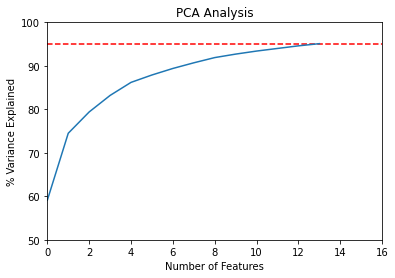

In [34]:
plt.ylabel("% Variance Explained")
plt.xlabel("Number of Features")
plt.title("PCA Analysis")
plt.ylim (50,100)
plt.xlim(0,16)
plt.axhline(y = 95, color = 'r', linestyle = '--')
plt.plot(var)

# Find the optimal value (Scenario #2, using cummulative PCA):

In [35]:
# The other way was to select the a number manually, between 1 and 2383, and calculate the cut-off point in the curve. 
pca2 = PCA(n_components=100)  # Find the optimal number of Principal Components 95% variance explained features
pca2

PCA(n_components=100)

In [36]:
P2 = pca.fit_transform(X-np.expand_dims(Xmean,axis=-1))    #eigen vectors v, and Eigen values landa
P2

array([[ 0.0051742 ,  0.10626399,  0.01062735, ...,  0.01879627,
        -0.01922575, -0.05036209],
       [-2.2630372 , -0.38258322,  0.08570537, ..., -0.04932544,
         0.0137127 , -0.02299847],
       [-0.23068776,  0.05513662, -0.42779801, ...,  0.00773981,
        -0.04239558, -0.06303643],
       ...,
       [-0.22129507,  0.32924513,  0.02123527, ..., -0.1875066 ,
         0.35197259, -0.11491861],
       [ 0.87214987, -0.64629679, -0.0212894 , ..., -0.10913009,
        -0.06635196,  0.08411509],
       [-0.04259179,  0.11791404, -0.18094207, ...,  0.16721471,
         0.1883819 , -0.01183254]])

In [37]:
var2 = np.cumsum(np.round(pca.explained_variance_ratio_, decimals = 3)*100)   # Calculate variance ratio (Cummulative)
var2

array([59.1, 74.5, 79.4, 83.2, 86.2, 87.9, 89.4, 90.7, 91.9, 92.7, 93.4,
       94. , 94.6, 95.1])

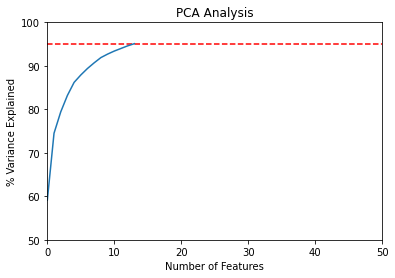

In [38]:
plt.ylabel("% Variance Explained")
plt.xlabel("Number of Features")
plt.title("PCA Analysis")
plt.ylim (50,100)
plt.xlim(0,50)
plt.axhline(y = 95, color = 'r', linestyle = '--')
plt.plot(var2)

# Generating bodyshape geometry:

In [39]:
import matplotlib.pyplot as plt

In [40]:
pcd = o3d.geometry.PointCloud()
pcd

PointCloud with 0 points.

In [41]:
model = P[:,0].reshape((-1,3))   # visualize the eigenshape no. 1
model

array([[ 0.0051742 , -2.2630372 , -0.23068776],
       [ 0.21725643, -0.31143422, -0.03404722],
       [-0.62199572, -0.41300523,  0.07777535],
       ...,
       [ 0.45336132,  0.55261832, -0.09029157],
       [-0.20525398,  0.89453562, -0.20150787],
       [-0.22129507,  0.87214987, -0.04259179]])

In [42]:
pcd.points = o3d.utility.Vector3dVector(model)
pcd.points

std::vector<Eigen::Vector3d> with 15178 elements.
Use numpy.asarray() to access data.

In [43]:
np.asarray(pcd.points)     # this is the same as "model" formula

array([[ 0.0051742 , -2.2630372 , -0.23068776],
       [ 0.21725643, -0.31143422, -0.03404722],
       [-0.62199572, -0.41300523,  0.07777535],
       ...,
       [ 0.45336132,  0.55261832, -0.09029157],
       [-0.20525398,  0.89453562, -0.20150787],
       [-0.22129507,  0.87214987, -0.04259179]])

In [44]:
print(o3d.visualization.draw_geometries([pcd]))

None


In [45]:
coeff = [0.0, 0.0]       # 0,0 is the average body shape  | 
# if we use 0.1, 0 it means that the 0.1 standard deviation along the first eigenshape
# 0.1 is the eigen vector and 0 is the eigen value 
# First coefficient corresponds to sex, + for females and - for males & the second coefficient corresponds to body size, + for fat and - for skinny.
# the range for coefficient can be determined by the singular values, see below. 

In [46]:
Z = coeff[0]*P[:,0] + coeff[1]*P[:,1] + Xmean   # Generate a new person with alpha 0 and alpha 1, PC1 = alpha0 * p0 + alpha1 * p1 + avg(x)
Z

array([-0.0391075543587753, 0.7981133849316668, -0.07032604029803118, ...,
       0.1462888354814658, -0.377556691713009, -0.023120786393600195],
      dtype=object)

In [47]:
model = Z.reshape((-1,3))   # visualize the eigenshape no. 1

In [48]:
pcd.points = o3d.utility.Vector3dVector(model)

In [49]:
print(o3d.visualization.draw_geometries([pcd]))

None


In [50]:
print(pca.explained_variance_ratio_)

[0.59095989 0.15421235 0.04927528 0.03807782 0.02966305 0.01729825
 0.01534068 0.01285944 0.01202996 0.00752271 0.00653947 0.00614128
 0.00586206 0.00460231]


In [51]:
print(pca.components_.T)

[[-0.0405844   0.05503071 -0.02083968 ... -0.00610109  0.00781403
  -0.03400222]
 [-0.02571368  0.01213742 -0.02638628 ... -0.0035651   0.00838904
   0.00946995]
 [-0.00824323  0.00893159  0.0046898  ...  0.00307181 -0.01363548
   0.00013011]
 ...
 [ 0.00265193 -0.01332094  0.03251298 ...  0.01557395 -0.00107016
  -0.0137822 ]
 [ 0.0129763  -0.01641657 -0.0713052  ... -0.01699751 -0.00924363
  -0.00750514]
 [ 0.02472202 -0.03448809 -0.03284705 ...  0.01469314 -0.00206182
  -0.01177867]]


In [52]:
p = np.array([[0.0, 0.0]])      
Z = pca.inverse_transform(p)
print(Z.shape)

ValueError: shapes (1,2) and (14,2383) not aligned: 2 (dim 1) != 14 (dim 0)

In [53]:
print(pca.explained_variance_ratio_)

print(pca.singular_values_)      # Variance 

[0.59095989 0.15421235 0.04927528 0.03807782 0.02966305 0.01729825
 0.01534068 0.01285944 0.01202996 0.00752271 0.00653947 0.00614128
 0.00586206 0.00460231]
[186.99479974  95.52347456  53.9964364   47.46642925  41.89463707
  31.99275261  30.12817248  27.58427523  26.67980176  21.09782183
  19.67079082  19.06251204  18.62411382  16.50206812]


# Interactive API

In [54]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets
import ipyvolume as ipv
#pip install ipyvolume

#### Use ipywidgets:

In [55]:
%matplotlib inline
from ipywidgets import FloatSlider


In [ ]:
def coefficient(a, b):
    o3d.utility.Vector3dVector((coeff[a]*P[:,a] + coeff[b]*P[:,b] + Xmean).reshape((-1,3))) 
    return (print(o3d.visualization.draw_geometries([pcd])))

interact(coefficient, a = (-1,1), b = (-1,1))

# output = interactive_plot.children[-1]
# output.layout.height = '350px'
# interactive_plot

In [59]:
def coefficient(a, b):
   o3d.utility.Vector3dVector((coeff[a]*P[:,a] + coeff[b]*P[:,b] + Xmean).reshape((-1,3))) 
   return (print(o3d.visualization.draw_geometries([pcd])))
interact(coefficient, a = FloatSlider(min=-1, max=1, step=0.1, continuous_update=True), b = FloatSlider(min=-1, max=1, step=0.1, continuous_update=True))
# output = interactive_plot.children[-1]
# output.layout.height = '350px'
# interactive_plot

interactive(children=(FloatSlider(value=0.0, description='a', max=1.0, min=-1.0), FloatSlider(value=0.0, descr…

<function __main__.coefficient(a, b)>

In [ ]:
a_widget = FloatSlider(min= -1.0, max=1.0, step=0.05)
b_widget = FloatSlider(min= -1.0, max=1.0, step=0.05, value=5.0)
def coefficient(a, b):
   o3d.utility.Vector3dVector((coeff[a]*P[:,a] + coeff[b]*P[:,b] + Xmean).reshape((-1,3))) 
   return (print(o3d.visualization.draw_geometries([pcd])))
interact(coefficient, a = a_widget, b = b_widget)

#### or:

In [ ]:
ipywidgets.interactive(coefficient, a = (-1,1) , b = (-1,1))

In [ ]:
# Use ipyvolume:

In [ ]:
# ipv.volshow(model)

## Using Open3D.j_visualizer:

In [ ]:
# !pip install open3d
# !pip install open3d-python
# !python3 -m pip install --upgrade pip
# !sudo pip3 install open3d==0.13.0
!pip install open3d.j_visualizer

In [ ]:
from open3d.j_visualizer import JVisualizer

In [ ]:
from open3d import JVisualizer

In [ ]:
import numpy as np
import open3d as o3
from open3d import JVisualizer

In [ ]:
points = (np.random.rand(1000, 3) - 0.5) /4

In [ ]:
colors = np.random.rand(1000,3)

In [ ]:
pcd2 = o3d.geometry.PointCloud()

In [ ]:
pcd2.points = o3d.utility.Vector3dVector(points)

In [ ]:
pcd2.colors = o3d.utility.Vector3dVector(colors)

In [ ]:
visualizer = JVisualizer()

In [ ]:
visualizer.add_geometry(pcd2)

In [ ]:
visualizer.show()